In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv("C:\\Users\\faiza\\OneDrive\\Desktop\\drug200.csv", encoding="ISO-8859-1")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# size of data
df.shape     # (rows, column)

(200, 6)

In [4]:
# pre processing the categorical data into numeric data
data1 = pd.get_dummies(df["Sex"])
data1

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
195,1,0
196,0,1
197,0,1
198,0,1


In [5]:
data2 = pd.get_dummies(df["BP"])
data2

,HIGH,LOW,NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,0,1
198,0,0,1


In [6]:
data3 = pd.get_dummies(df["Cholesterol"])
data3

,HIGH,NORMAL
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,1,0
198,0,1


In [7]:
# adding these columns and dropping old columns
newdf = df.drop(["Sex","BP","Cholesterol"],axis = 1)

In [8]:
newdf[["Female","Male"]]=data1
newdf[["BP_HIGH","BP_LOW","BP_NORMAL"]]=data2
newdf[["CHOL_HIGH","CHOL_NORMAL"]]=data3
newdf

,Age,Na_to_K,Drug,Female,Male,BP_HIGH,BP_LOW,BP_NORMAL,CHOL_HIGH,CHOL_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


In [9]:
#train test split 
X = newdf[["Age","Na_to_K","Female","Male","BP_HIGH","BP_LOW","BP_NORMAL","CHOL_HIGH","CHOL_NORMAL"]]
Y = newdf[["Drug"]]     # Y = target 
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=4)

In [10]:
#The format() method formats the specified value(s) and insert them inside the string's placeholder.

#The placeholder is defined using curly brackets: {}. Read more about the placeholders in the Placeholder section below.

#The format() method returns the formatted string.

In [11]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(Y_trainset.shape)) 

Shape of X training set (140, 9) &  Size of Y training set (140, 1)


In [12]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(Y_testset.shape)) 

Shape of X training set (60, 9) &  Size of Y training set (60, 1)


In [13]:
#modelling of decision tree
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
drugTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
predTree = drugTree.predict(X_testset)

In [21]:
print(predTree,"\n")
print("\n",Y_testset)

['drugY' 'drugY' 'drugY' 'drugY' 'drugC' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugA' 'drugA' 'drugX' 'drugA' 'drugY' 'drugY' 'drugY' 'drugY' 'drugX'
 'drugA' 'drugC' 'drugX' 'drugC' 'drugA' 'drugX' 'drugC' 'drugB' 'drugX'
 'drugY' 'drugX' 'drugY' 'drugB' 'drugC' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugA' 'drugA' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY' 'drugC' 'drugY'
 'drugY' 'drugY' 'drugX' 'drugY' 'drugY' 'drugA' 'drugY' 'drugX' 'drugY'
 'drugC' 'drugY' 'drugY' 'drugY' 'drugC' 'drugY'] 


       Drug
11   drugY
99   drugY
128  drugY
175  drugY
1    drugC
111  drugX
90   drugY
177  drugY
88   drugY
187  drugA
61   drugA
199  drugX
191  drugA
123  drugY
184  drugY
188  drugY
33   drugY
171  drugX
138  drugB
84   drugC
81   drugX
102  drugC
147  drugA
34   drugX
47   drugC
124  drugB
112  drugX
6    drugY
14   drugX
190  drugY
80   drugB
18   drugC
167  drugX
45   drugX
153  drugX
119  drugY
100  drugA
83   drugA
181  drugX
71   drugY
26   drugY
134  drugY
180  drugY
158  drugC
189  drugY
89

In [24]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


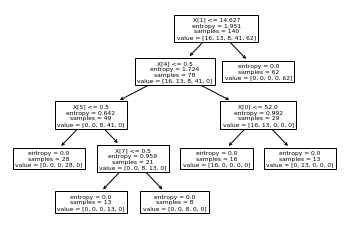

In [25]:
tree.plot_tree(drugTree)
plt.show()